# Feature-importance

## Libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

## Read data

In [2]:
df_test = pd.read_csv('../final_data/df_test.csv')
y_test = pd.read_csv('../final_data/y_test.csv', header=None)
df_test2 = pd.read_csv('../final_data/df_test_forest.csv')
y_test2 = pd.read_csv('../final_data/y_test_forest.csv', header=None)

## Read models

In [3]:
import pickle

def load_model(filename: str):
    return pickle.load(open('../models/' + filename + '.sav', 'rb'))

In [4]:
model1 = load_model('gradient_boost_best')
model2 = load_model('random_forest_best')

## Calculate feature_importance on models

In [5]:
model1.score(df_test, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 28 

In [6]:
model2.score(df_test2, y_test2)

0.75

## function:

In [7]:
def feature_imp(mod, df, y):
    modtyp = type(mod)
    if modtyp in [sklearn.linear_model.LogisticRegression,
                 sklearn.svm.SVC]:
        importances = mod.coef_[0]
        # dla svc tylko przy kernel="linear"
    elif modtyp == sklearn.naive_bayes.GaussianNB:
        importances = sklearn.inspection.permutation_importance(modelG, df, y)['importances_mean']
    else:
        importances = mod.feature_importances_
        # pozostałe typy, które MY obsługujemy
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(15, 11))
    plt.title("Feature importance")
    plt.bar(df.columns, importances[indices], color="r", align="center")
    plt.xticks(rotation=90)
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

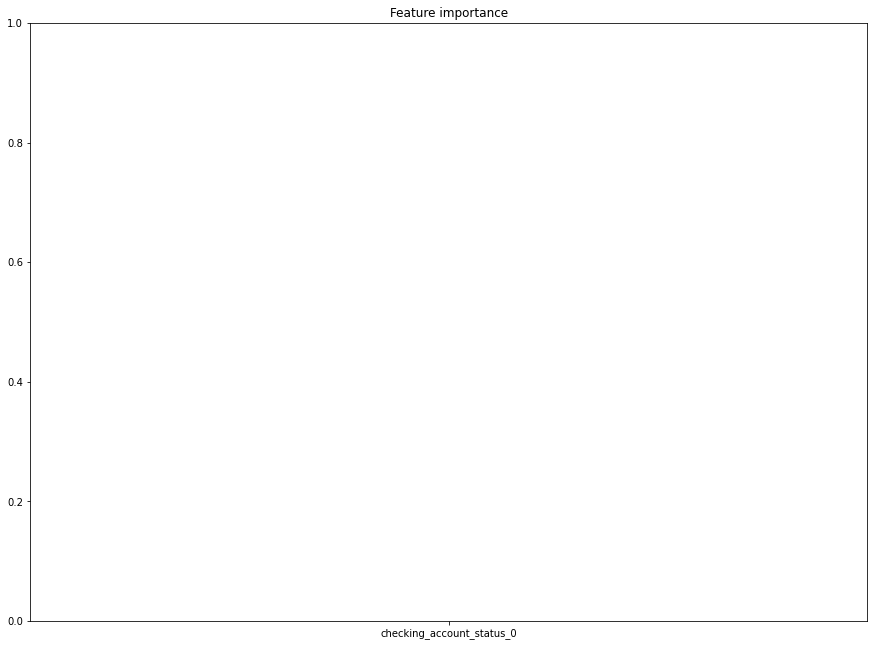

In [8]:
feature_imp(model1, df_test, y_test)

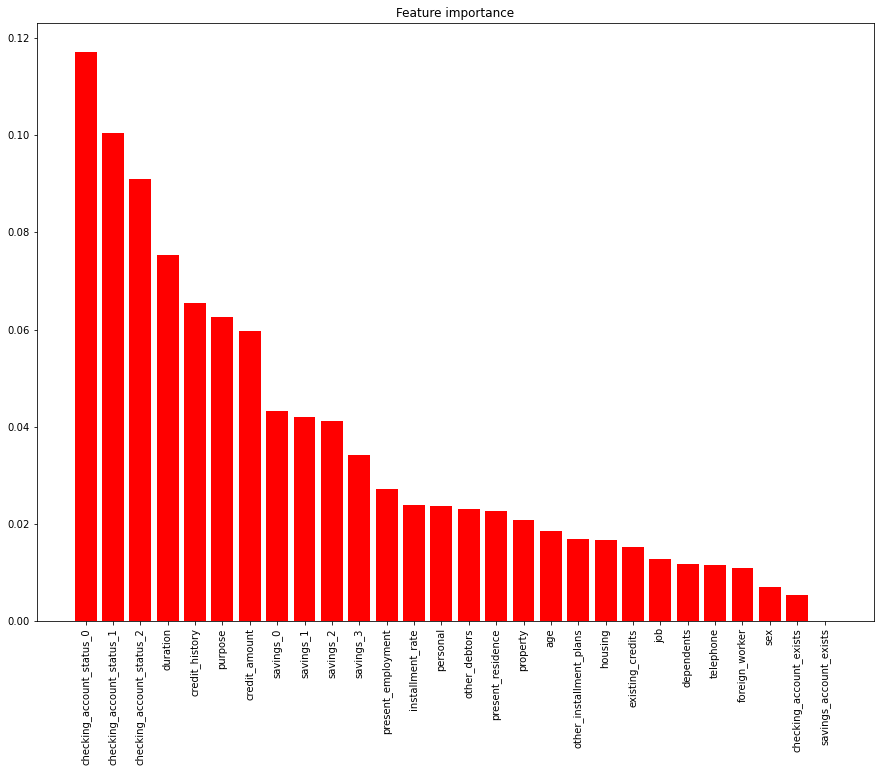

In [9]:
feature_imp(model2, df_test2, y_test2)